# VireES access to observatory data

This notebook demonstrates access to AUX_OBS observatory data via VirES for Swarm API.

Avalable collections

| Collection Name | Description |
|---|---|
| `SW_OPER_AUX_OBSM2_` | 1 minute data from all observatories |
| `SW_OPER_AUX_OBSM2_:<code>` | 1 minute data from a single selected observatory |
| `SW_OPER_AUX_OBSS2_` | 1 second data from all observatories |
| `SW_OPER_AUX_OBSS2_:<code>` | 1 second data from a single selected observatory  |

The `<code>` is a 3-letter [IAGA observatory code](http://www.wdc.bgs.ac.uk/catalog/obs_code.html).


Avalable variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `IAGA_code` | $-$ | char [3] | [IAGA observatory code](http://www.wdc.bgs.ac.uk/catalog/obs_code.html) |
| `Timestamp` | $-$ | scalar |UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_NEC` | $\text{nT}$ | vector [3] | Measured magnetic field vector in ITRF NEC frame. |
| `F` | $\text{nT}$ | scalar | Magnetic field intensity calculated from `B_NEC` |
| `Quality` | $-$ | char [1] |Data quality: `D` for definitive and `Q` for quasi-definitive |


In [1]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

server_url = 'https://staging.viresdisc.vires.services/ows'

AUX_OBSM2_COLLECTION = "SW_OPER_AUX_OBSM2_"
AUX_OBSS2_COLLECTION = "SW_OPER_AUX_OBSS2_"
AUX_OBSM2_OBSERVATORIES = [
    "ABG", "ABK", "API", "ARS", "ASC", "ASP",
    "BDV", "BEL", "BFO", "BLC", "BMT", "BOU",
    "BOX", "BRD", "BRW", "BSL", "CBB", "CKI",
    "CLF", "CMO", "CNB", "CSY", "CTA", "CYG",
    "DED", "DLT", "DMC", "DUR", "EBR", "ESK",
    "EYR", "FCC", "FRD", "FRN", "FUR", "GAN",
    "GCK", "GDH", "GNG", "GUA", "GUI", "HAD",
    "HBK", "HER", "HLP", "HON", "HRB", "HRN",
    "HUA", "HYB", "IPM", "IRT", "IZN", "JCO",
    "KAK", "KDU", "KEP", "KHB", "KNY", "KOU",
    "LER", "LON", "LRM", "LYC", "LZH", "MAB",
    "MAW", "MBO", "MCQ", "MGD", "MMB", "NAQ",
    "NEW", "NGK", "NVS", "OTT", "PAG", "PET",
    "PST", "RES", "SBA", "SBL", "SFS", "SHU",
    "SIT", "SJG", "SOD", "SPG", "SPT", "STJ",
    "SUA", "TAM", "TDC", "THL", "THY", "TSU",
    "TUC", "UPS", "VIC", "VNA", "VSS", "WIC",
    "WNG",
]
AUX_OBSS2_OBSERVATORIES = [
    "CLF",  "DLT", "EBR", "IPM", "KOU", "MBO",
    "TAM",   
]

SwarmRequest.PRODUCT_VARIABLES['AUX_AOB'] = [
    "B_NEC", "F", "IAGA_code", "Quality",
]

SwarmRequest.COLLECTIONS['AUX_AOB'] = [
    AUX_OBSS2_COLLECTION,
    AUX_OBSM2_COLLECTION,
] + [
    "%s:%s" % (AUX_OBSM2_COLLECTION, code)
    for code in AUX_OBSM2_OBSERVATORIES
] + [
    "%s:%s" % (AUX_OBSS2_COLLECTION, code)
    for code in AUX_OBSS2_OBSERVATORIES
]

## 1 second observatory data - all

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (9.382MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 100800)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01T13:59:59
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    IAGA_code   (Timestamp) <U3 'CLF' 'DLT' 'EBR' 'IPM' ... 'KOU' 'MBO' 'TAM'
    QDLat       (Timestamp) float64 43.2 5.261 34.65 ... 7.507 3.007 12.69
    Longitude   (Timestamp) float64 2.26 108.5 0.333 250.6 ... 307.3 343.0 5.53
    Radius      (Timestamp) float64 6.367e+06 6.379e+06 ... 6.377e+06 6.376e+06
    F           (Timestamp) float64 4.782e+04 4.154e+04 ... 3.273e+04 3.778e+04
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    MLT         (Timestamp) float64 10.65 17.46 10.47 ... 10.75 13.12 14.61
    QDLon       (Timestamp) float64 79.05 -178.9 76.36 ... 22.37 57.92 80.26
    Latitude    (Timestamp) float64 47.83 11.87 40.77 ... 5.175 14.3 22.65
    B

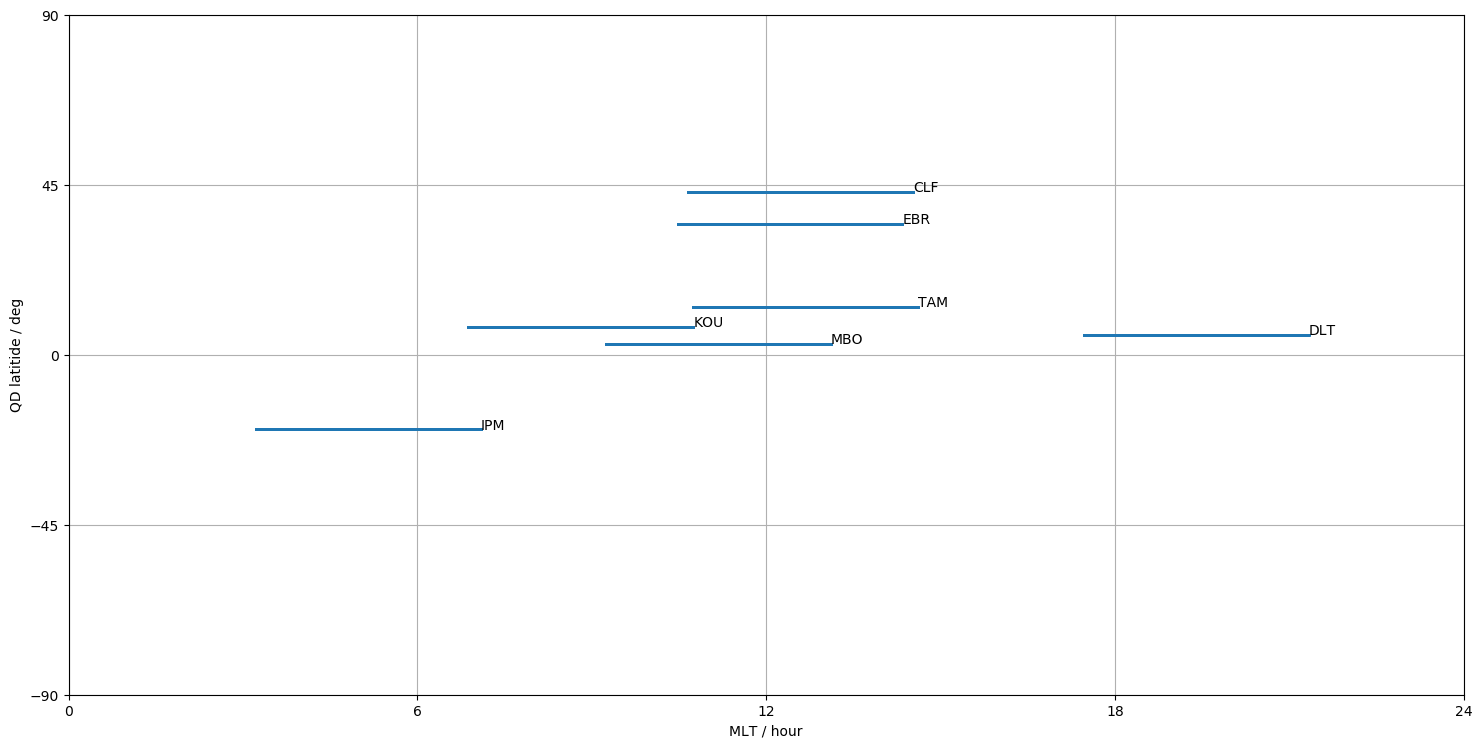

In [2]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSS2_')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax.plot(data['MLT'].values, data['QDLat'].values, '.', ms=2)
ax.set_ylim([-90, 90])

for qdlat, mlt, code in zip(data['QDLat'].values[idx], data['MLT'].values[idx], data['IAGA_code'].values[idx]):
    ax.text(mlt, qdlat, code)

ax.set_yticks([-90, -45, 0, +45, 90])
ax.set_ylim([-90, 90])
ax.set_ylabel('QD latitide / deg')
ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xlim([0, 24])
ax.set_xlabel('MLT / hour')
ax.grid()
show()

## 1 second observatory data - single sensor

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (1.346MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 14400)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01T13:59:59
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    IAGA_code   (Timestamp) <U3 'CLF' 'CLF' 'CLF' 'CLF' ... 'CLF' 'CLF' 'CLF'
    QDLat       (Timestamp) float64 43.2 43.2 43.2 43.2 ... 43.2 43.2 43.2 43.2
    Longitude   (Timestamp) float64 2.26 2.26 2.26 2.26 ... 2.26 2.26 2.26 2.26
    Radius      (Timestamp) float64 6.367e+06 6.367e+06 ... 6.367e+06 6.367e+06
    F           (Timestamp) float64 4.782e+04 4.782e+04 ... 4.783e+04 4.783e+04
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    MLT         (Timestamp) float64 10.65 10.65 10.66 ... 14.52 14.53 14.53
    QDLon       (Timestamp) float64 79.05 79.05 79.05 ... 79.05 79.05 79.05
    Latitude    (Timestamp) float64 47.83 47.83 47.83 ... 47.83 47.83 47.83
 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


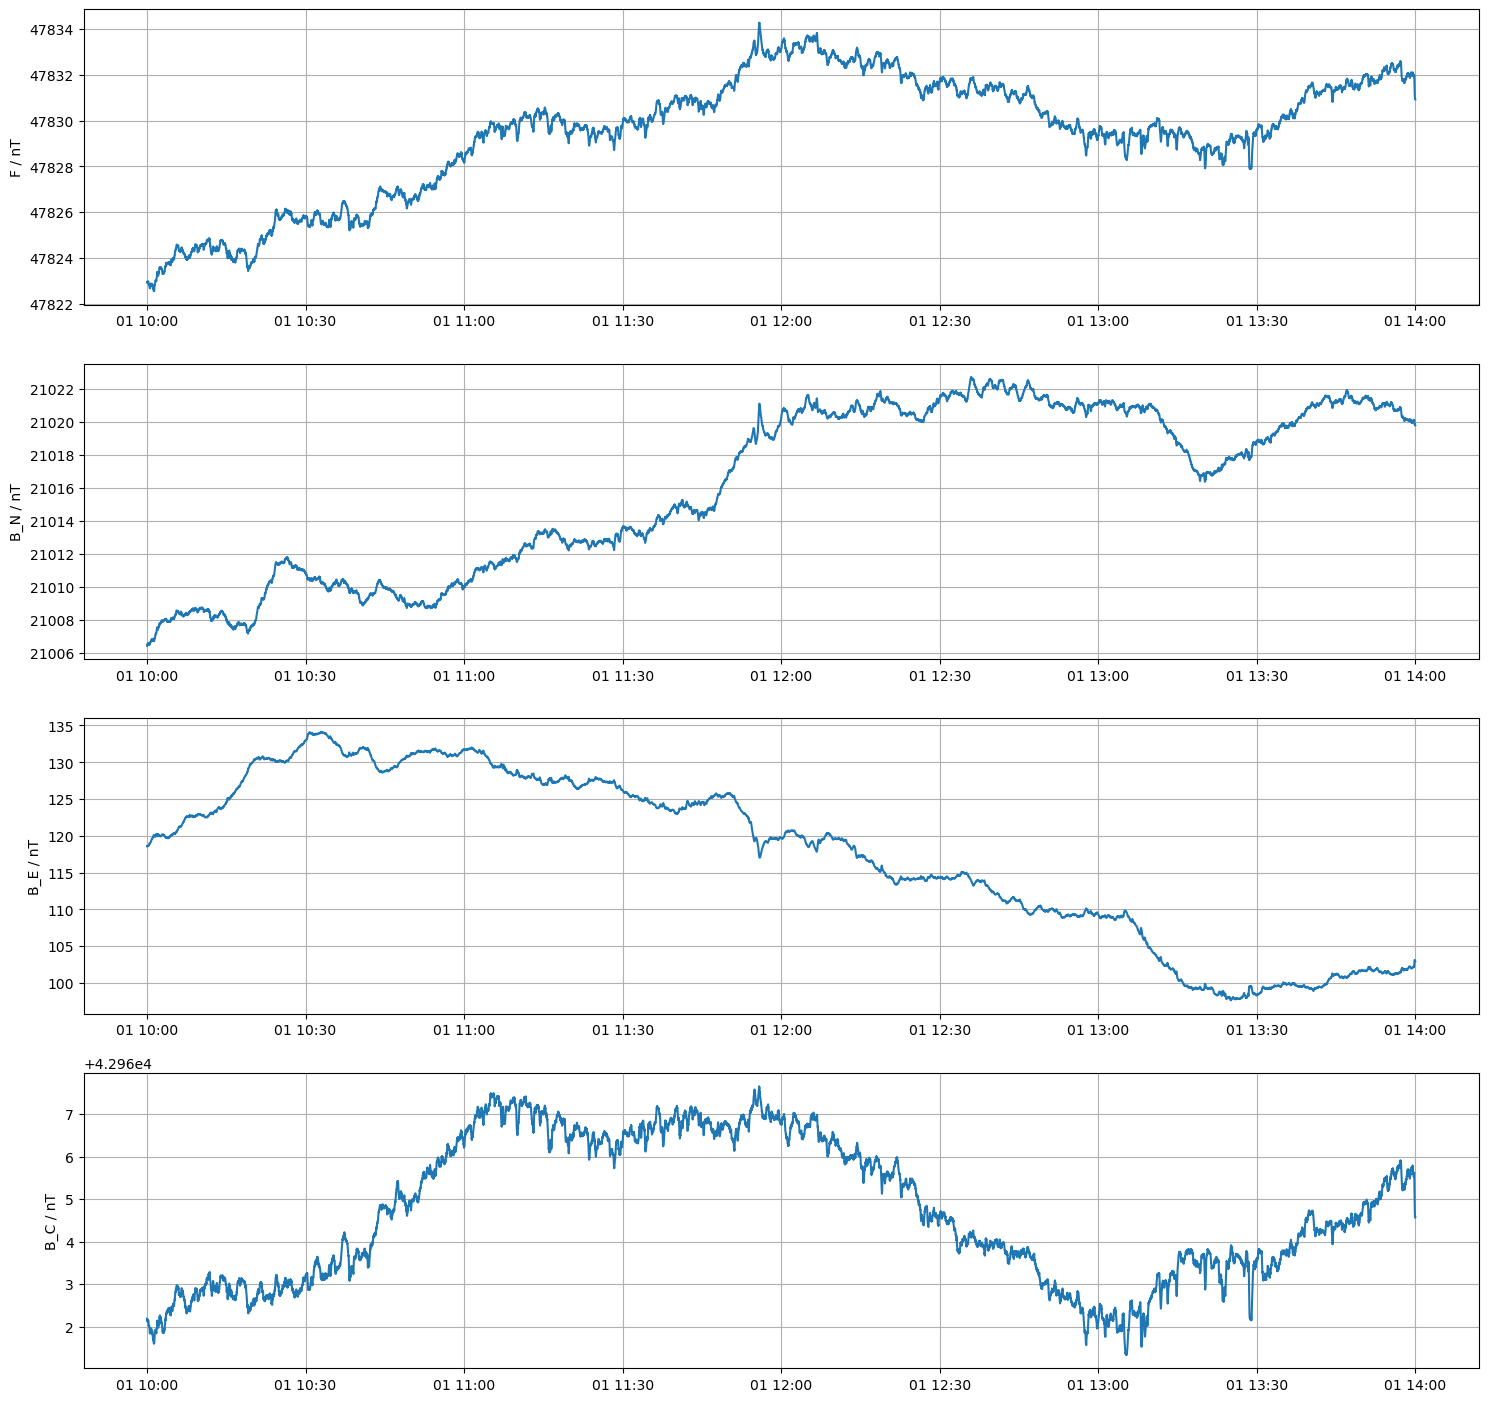

In [3]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSS2_:CLF')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

ax = subplot(4, 1, 1)
ax.plot(data['Timestamp'].values, data['F'].values, '-')
ax.set_ylabel('F / nT')
ax.grid()

ax = subplot(4, 1, 2)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 0], '-')
ax.set_ylabel('B_N / nT')
ax.grid()

ax = subplot(4, 1, 3)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 1], '-')
ax.set_ylabel('B_E / nT')
ax.grid()

ax = subplot(4, 1, 4)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 2], '-')
ax.set_ylabel('B_C / nT')
ax.grid()

show()

## 1 minute observatory data - all

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.306MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 24720)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01T13:59:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    IAGA_code   (Timestamp) <U3 'ABG' 'ABK' 'API' 'ARS' ... 'VSS' 'WIC' 'WNG'
    QDLat       (Timestamp) float64 12.57 65.39 -18.52 ... -20.53 43.03 49.75
    Longitude   (Timestamp) float64 72.87 18.82 171.8 58.6 ... 316.4 15.86 9.073
    Radius      (Timestamp) float64 6.376e+06 6.36e+06 ... 6.367e+06 6.364e+06
    F           (Timestamp) float64 4.296e+04 5.319e+04 ... 4.85e+04 4.963e+04
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'Q' 'D' 'D' ... 'D' 'D' 'Q' 'D' 'D'
    MLT         (Timestamp) float64 15.12 12.08 21.85 ... 10.73 15.29 14.98
    QDLon       (Timestamp) float64 146.0 100.5 -113.0 ... 22.38 90.74 86.09
    Latitude    (Timestamp) float64 18.5 68.23 -13.73 ... -22.26 47.74 53.56
  

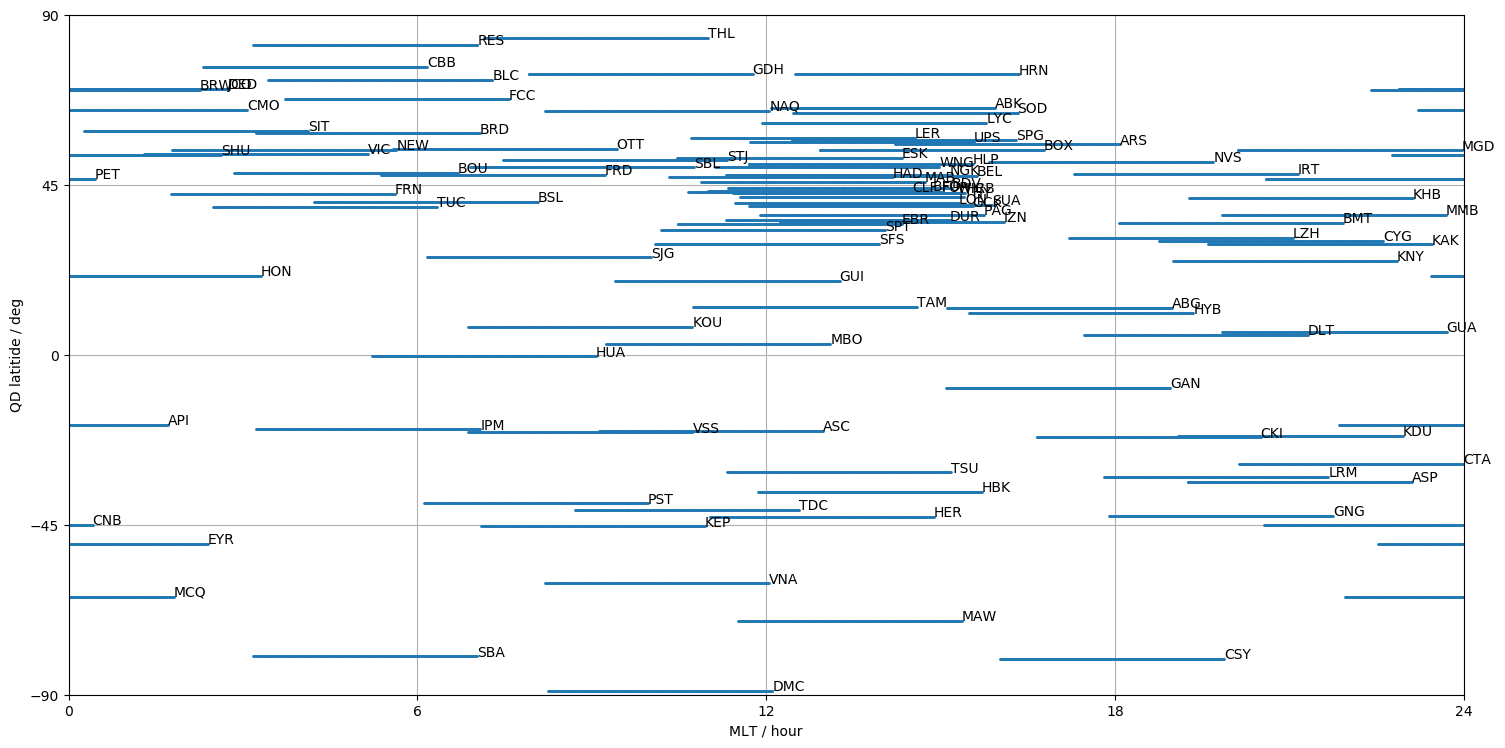

In [4]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSM2_')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax.plot(data['MLT'].values, data['QDLat'].values, '.', ms=2)
ax.set_ylim([-90, 90])

for qdlat, mlt, code in zip(data['QDLat'].values[idx], data['MLT'].values[idx], data['IAGA_code'].values[idx]):
    ax.text(mlt, qdlat, code)

ax.set_yticks([-90, -45, 0, +45, 90])
ax.set_ylim([-90, 90])
ax.set_ylabel('QD latitide / deg')
ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xlim([0, 24])
ax.set_xlabel('MLT / hour')
ax.grid()
show()

## 1 minute observatory data - single sensor

      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.105MB)


<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 240)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01T13:59:00
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    IAGA_code   (Timestamp) <U3 'CLF' 'CLF' 'CLF' 'CLF' ... 'CLF' 'CLF' 'CLF'
    QDLat       (Timestamp) float64 43.2 43.2 43.2 43.2 ... 43.2 43.2 43.2 43.2
    Longitude   (Timestamp) float64 2.26 2.26 2.26 2.26 ... 2.26 2.26 2.26 2.26
    Radius      (Timestamp) float64 6.367e+06 6.367e+06 ... 6.367e+06 6.367e+06
    F           (Timestamp) float64 4.782e+04 4.782e+04 ... 4.783e+04 4.783e+04
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    MLT         (Timestamp) float64 10.65 10.67 10.69 10.7 ... 14.48 14.49 14.51
    QDLon       (Timestamp) float64 79.05 79.05 79.05 ... 79.05 79.05 79.05
    Latitude    (Timestamp) float64 47.83 47.83 47.83 ... 47.83 47.83 47.8

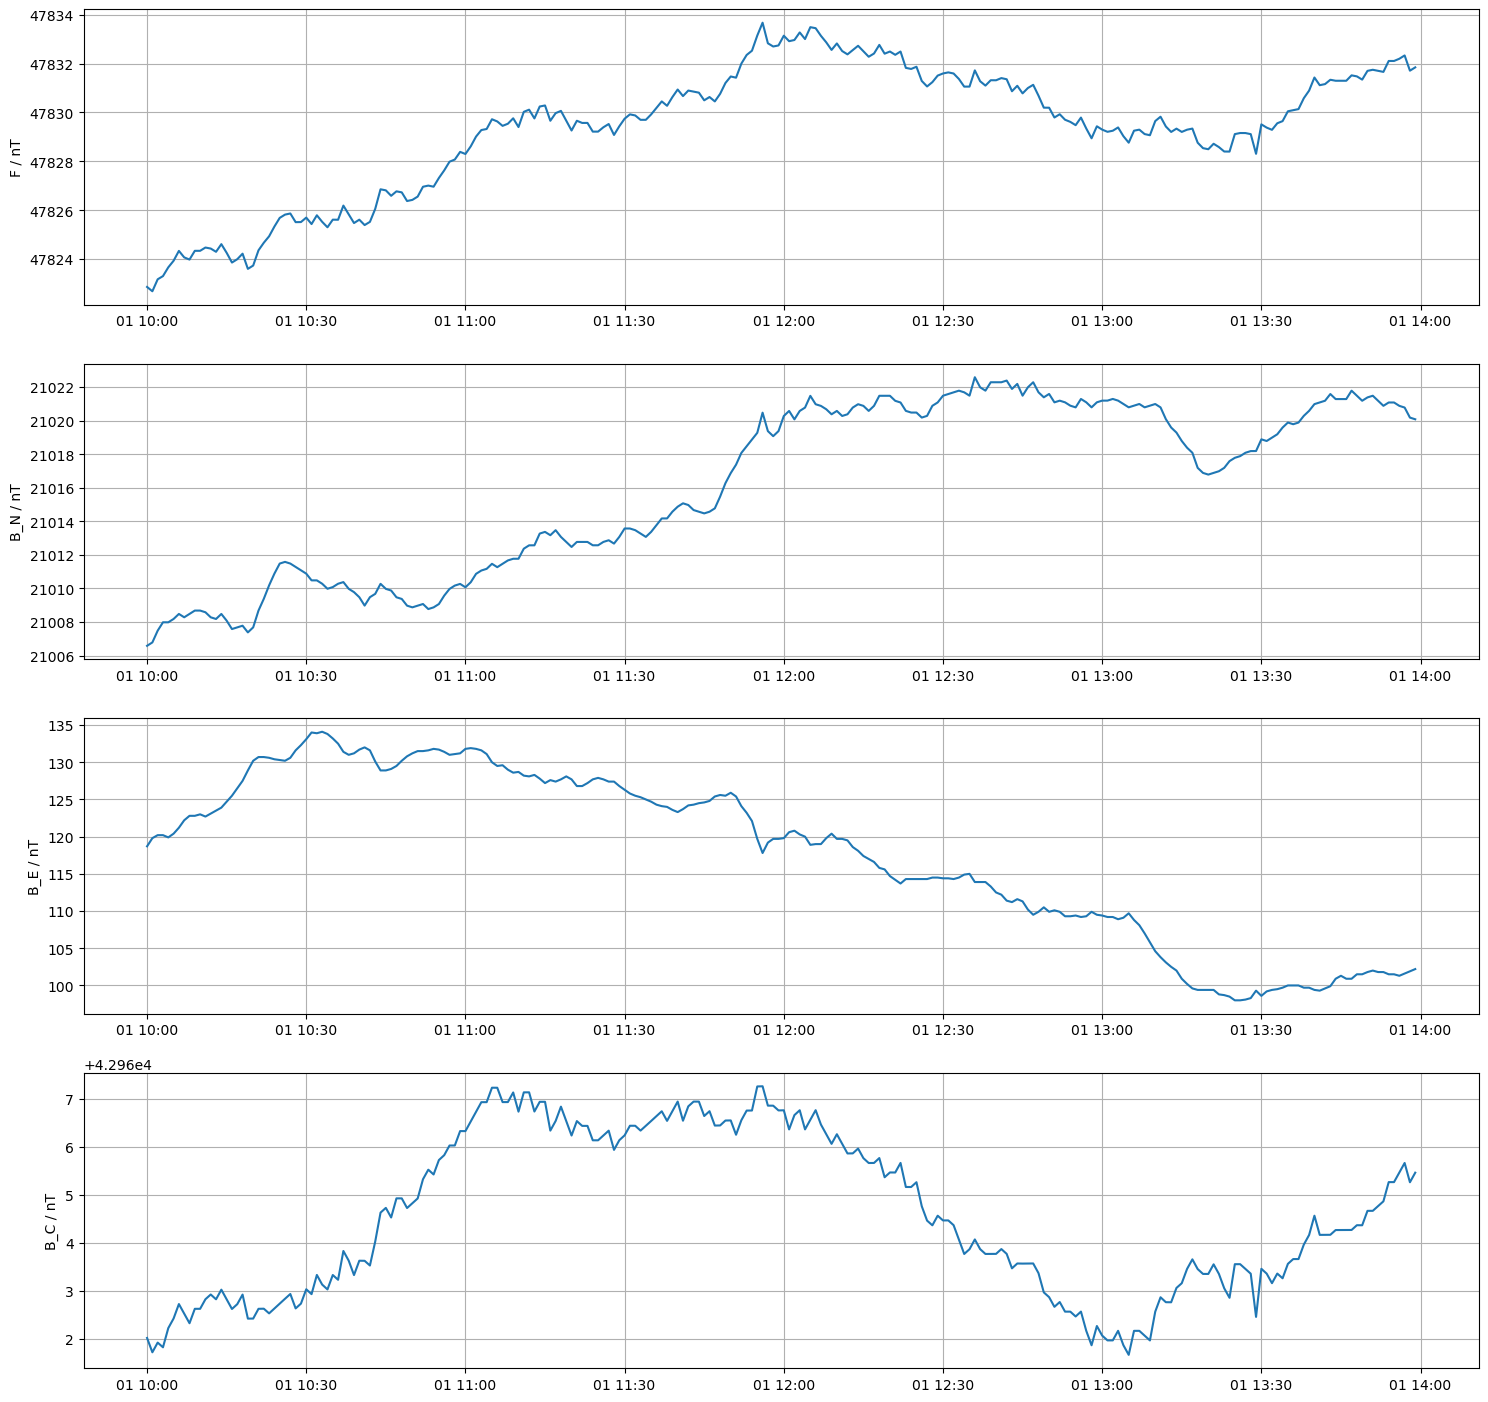

In [5]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSM2_:CLF')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)
ax = subplot(4, 1, 1)
ax.plot(data['Timestamp'].values, data['F'].values, '-')
ax.set_ylabel('F / nT')
ax.grid()

ax = subplot(4, 1, 2)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 0], '-')
ax.set_ylabel('B_N / nT')
ax.grid()

ax = subplot(4, 1, 3)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 1], '-')
ax.set_ylabel('B_E / nT')
ax.grid()

ax = subplot(4, 1, 4)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 2], '-')
ax.set_ylabel('B_C / nT')
ax.grid()

show()